## Third Assignment
Lorenzo Domenichetti 2011653

due 02-05

In [1]:
library(tidyverse)
library(lubridate)
library(gridExtra)
library(grid)
library(ggplot2)
library(lattice)

-- Attaching packages ------------------------------------------------------------------------------- tidyverse 1.3.0 --

v ggplot2 3.3.3     v purrr   0.3.4
v tibble  3.1.0     v dplyr   1.0.5
v tidyr   1.1.3     v stringr 1.4.0
v readr   1.4.0     v forcats 0.5.1

Warning message:
"package 'ggplot2' was built under R version 4.0.5"
-- Conflicts ---------------------------------------------------------------------------------- tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()


Attaching package: 'lubridate'


The following objects are masked from 'package:base':

    date, intersect, setdiff, union


Warning message:
"package 'gridExtra' was built under R version 4.0.5"

Attaching package: 'gridExtra'


The following object is masked from 'package:dplyr':

    combine


Warning message:
"package 'lattice' was built under R version 4.0.5"


## Exercise 1 - Six Boxes Toy Model : inference

• The six boxes toy model is described in reference [1].

• Labeling the boxes as follows:

 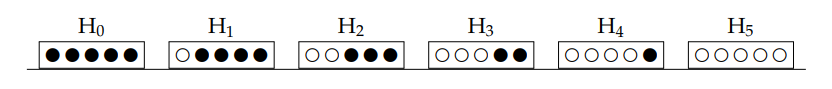
 
• write a program in R that:

1) allows the user to insert the color of a randomly extracted box 

2) prints on the standard output the probability of selecting each box

3) plots the probability for each box as a function of the extraction step

In [2]:
vecp <- rep(1/6,6)
vboxs <- c(0,1/5, 2/5, 3/5, 4/5, 5/5)
out <- matrix(NA, nrow=0, ncol=6)

In [3]:
iter <- 1

n1 <- -1

while(!(n1 == 1 || n1 == 0)){
    
    n1<-as.integer(readline(prompt="Enter box number 0 Black - 1 White - 999 to quit:" ))
    if(n1 == 999){
        break
    }
    message(n1)
    
    norm <- 0
    for (i in 1:6){
    norm <- norm + vecp[i]*(vboxs[i] * n1 + (1-n1)*(1-vboxs[i]))
    } 

    for (i in 1:6){
    vecp[i] <- vecp[i]*(vboxs[i] * n1 + (1-n1)*(1-vboxs[i]))/ norm 
    }
    message("The probabilities for each box:", vecp)
    out <- rbind(out, vecp)
    n1 <- -1
}
    
out

Enter box number 0 Black - 1 White - 999 to quit:1


1

The probabilities for each box:00.06666666666666670.1333333333333330.20.2666666666666670.333333333333333



Enter box number 0 Black - 1 White - 999 to quit:1


1

The probabilities for each box:00.01818181818181820.07272727272727270.1636363636363640.2909090909090910.454545454545454



Enter box number 0 Black - 1 White - 999 to quit:1


1

The probabilities for each box:00.004444444444444440.03555555555555560.120.2844444444444440.555555555555555



Enter box number 0 Black - 1 White - 999 to quit:1


1

The probabilities for each box:00.001021450459652710.01634320735444330.08273748723186920.2614913176710930.638406537282942



Enter box number 0 Black - 1 White - 999 to quit:1


1

The probabilities for each box:00.0002259887005649720.00723163841807910.05491525423728810.2314124293785310.706214689265537



Enter box number 0 Black - 1 White - 999 to quit:1


1

The probabilities for each box:04.87448208627833e-050.003119668535218130.0355349744089690.1996587862539610.761637825980989



Enter box number 0 Black - 1 White - 999 to quit:1


1

The probabilities for each box:01.03279111799639e-050.001321972631035370.02258714175058090.1692124967725280.806868060934676



Enter box number 0 Black - 1 White - 999 to quit:0


0

The probabilities for each box:00.000189161070651660.01815946278255940.206847630757590.7748037453891990



Enter box number 0 Black - 1 White - 999 to quit:0


0

The probabilities for each box:00.0006083650190114070.04380228136882130.3326235741444870.6229657794676810



Enter box number 0 Black - 1 White - 999 to quit:1


1

The probabilities for each box:00.0001700318809776830.02448459086078640.2788947927736450.6964505844845910



Enter box number 0 Black - 1 White - 999 to quit:0


0

The probabilities for each box:00.0005120.0552960.4199040.5242880



Enter box number 0 Black - 1 White - 999 to quit:1


1

The probabilities for each box:00.0001476368870762360.0318895676084670.3632421060401940.6047206894642630



Enter box number 0 Black - 1 White - 999 to quit:999


vecp,0,6.666667e-02,0.133333333,0.20000000,0.2666667,0.3333333
vecp,0,1.818182e-02,0.072727273,0.16363636,0.2909091,0.4545455
vecp,0,4.444444e-03,0.035555556,0.12000000,0.2844444,0.5555556
vecp,0,1.021450e-03,0.016343207,0.08273749,0.2614913,0.6384065
vecp,0,2.259887e-04,0.007231638,0.05491525,0.2314124,0.7062147
vecp,0,4.874482e-05,0.003119669,0.03553497,0.1996588,0.7616378
vecp,0,1.032791e-05,0.001321973,0.02258714,0.1692125,0.8068681
vecp,0,1.891611e-04,0.018159463,0.20684763,0.7748037,0.0000000
vecp,0,6.083650e-04,0.043802281,0.33262357,0.6229658,0.0000000
vecp,0,1.700319e-04,0.024484591,0.27889479,0.6964506,0.0000000
vecp,0,5.120000e-04,0.055296000,0.41990400,0.5242880,0.0000000


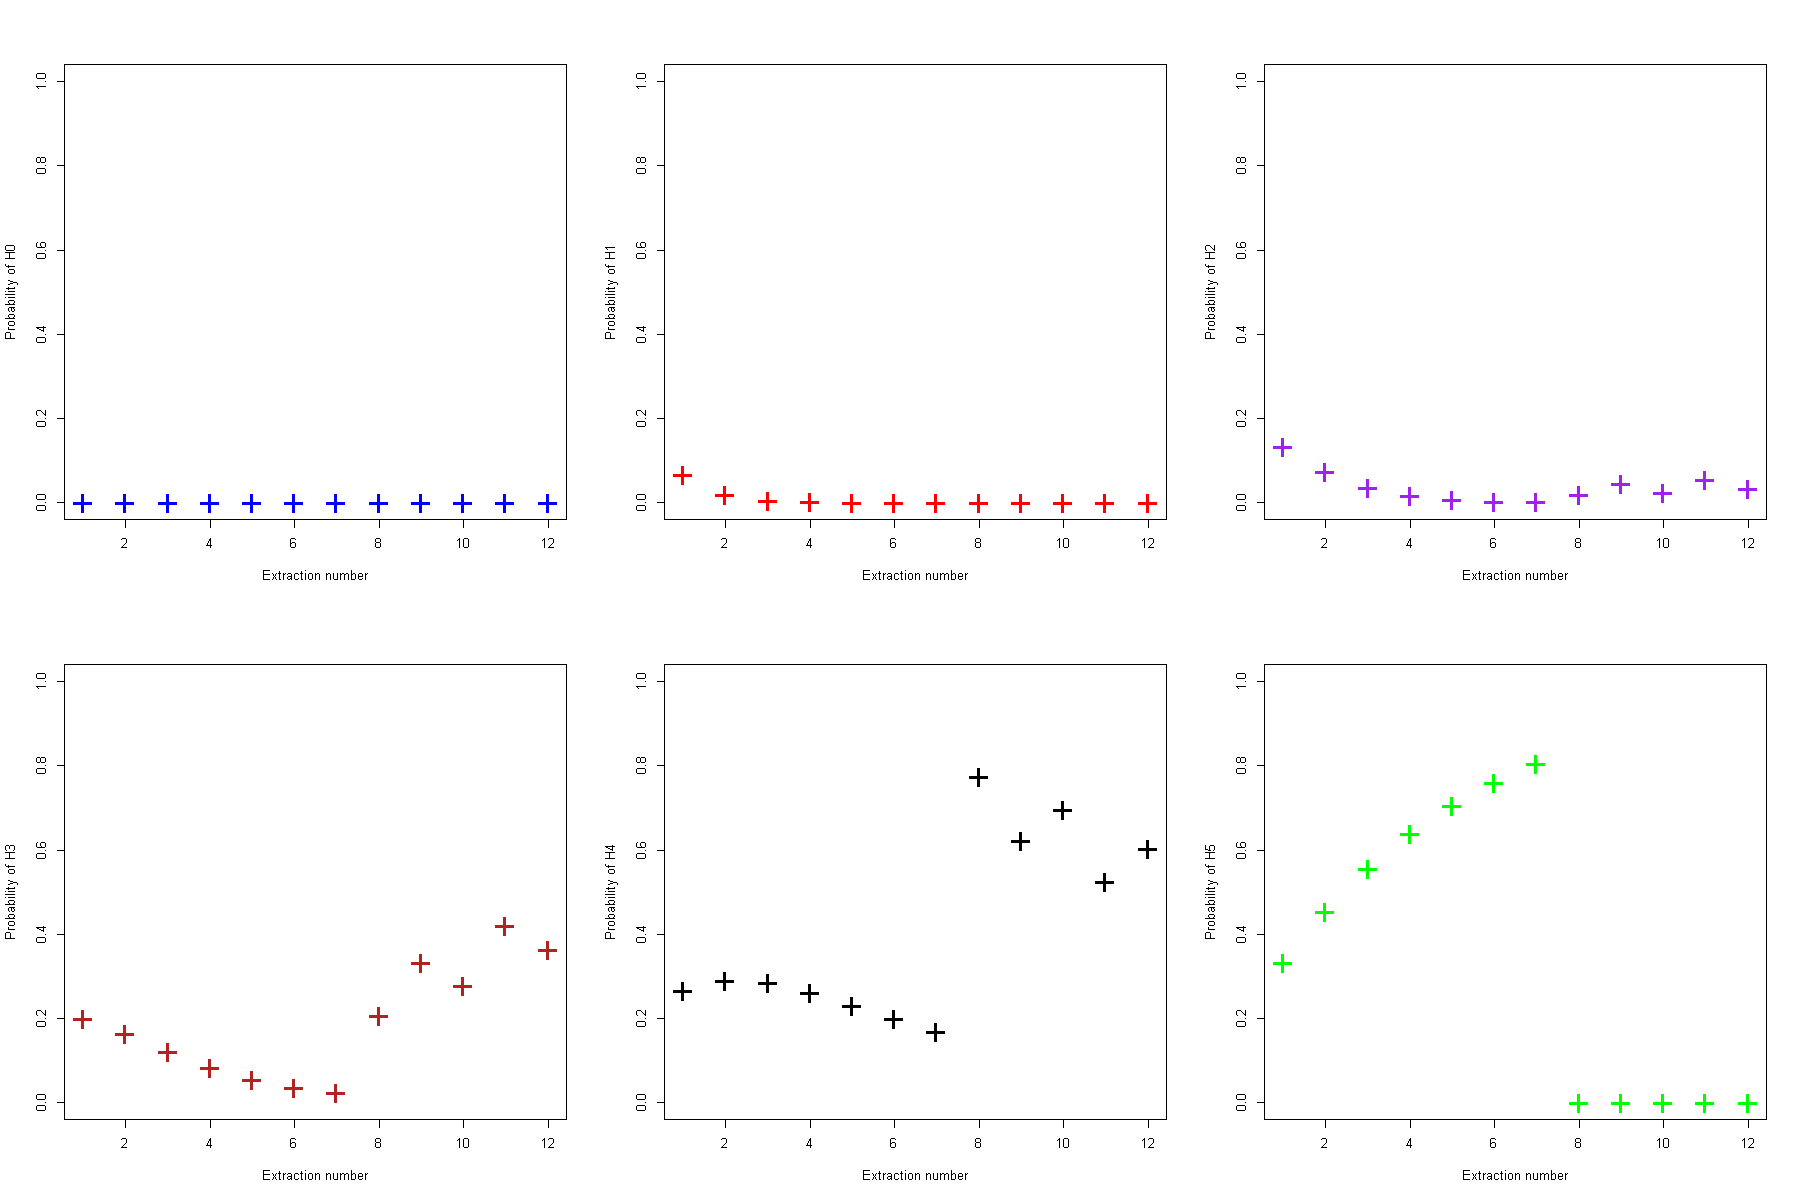

In [4]:
par(mfrow = c(2, 3))
options(repr.plot.width=15, repr.plot.height=10)

xs = seq(1,length(out[,1]))
colors = c("blue", "red", "purple", "firebrick", "black", "green")
for (i in 1:6){
    plot(xs, out[,i], xlab = "Extraction number", ylab = paste0("Probability of H", i-1), ylim = c(0,1), col = colors[i], pch="+", cex = 3)
}

## Exercise 2 - Six Boxes Toy Model : simulation

• consider again the six boxes toy model of the previous exercise and write a simulation
program that: 

1) selects a random box

2) makes random sampling from the box

3) prints on the standard output the probability of selecting each box

4) plots the probability for each box as a function of the number of trial

In [25]:
sel_box <- sample(c(0:5),1)
prob <- sel_box/5

vecp <- rep(1/6,6)
out_auto <- matrix(NA, nrow=0, ncol=6)

num_samples <- 20
res <- sample(c(0,1), size=num_samples, replace=TRUE, prob=c(1-prob,prob))

vecp <- rep(1/6,6)

for (n1 in res){
    
    norm <- 0
    for (i in 1:6){
    norm <- norm + vecp[i]*(vboxs[i] * n1 + (1-n1)*(1-vboxs[i]))
    } 

    for (i in 1:6){
    vecp[i] <- vecp[i]*(vboxs[i] * n1 + (1-n1)*(1-vboxs[i]))/ norm 
    }
    out_auto <- rbind(out_auto, vecp)
}
out_auto

vecp,0.3333333,0.2666666667,0.20000000,0.1333333,0.06666667,0
vecp,0.0000000,0.2000000000,0.30000000,0.3000000,0.20000000,0
vecp,0.0000000,0.3200000000,0.36000000,0.2400000,0.08000000,0
vecp,0.0000000,0.4383561644,0.36986301,0.1643836,0.02739726,0
vecp,0.0000000,0.2461538462,0.41538462,0.2769231,0.06153846,0
vecp,0.0000000,0.1142857143,0.38571429,0.3857143,0.11428571,0
vecp,0.0000000,0.1828571429,0.46285714,0.3085714,0.04571429,0
vecp,0.0000000,0.0824742268,0.41752577,0.4175258,0.08247423,0
vecp,0.0000000,0.0329896907,0.33402062,0.5010309,0.13195876,0
vecp,0.0000000,0.0120754717,0.24452830,0.5501887,0.19320755,0
vecp,0.0000000,0.0041290323,0.16722581,0.5643871,0.26425806,0


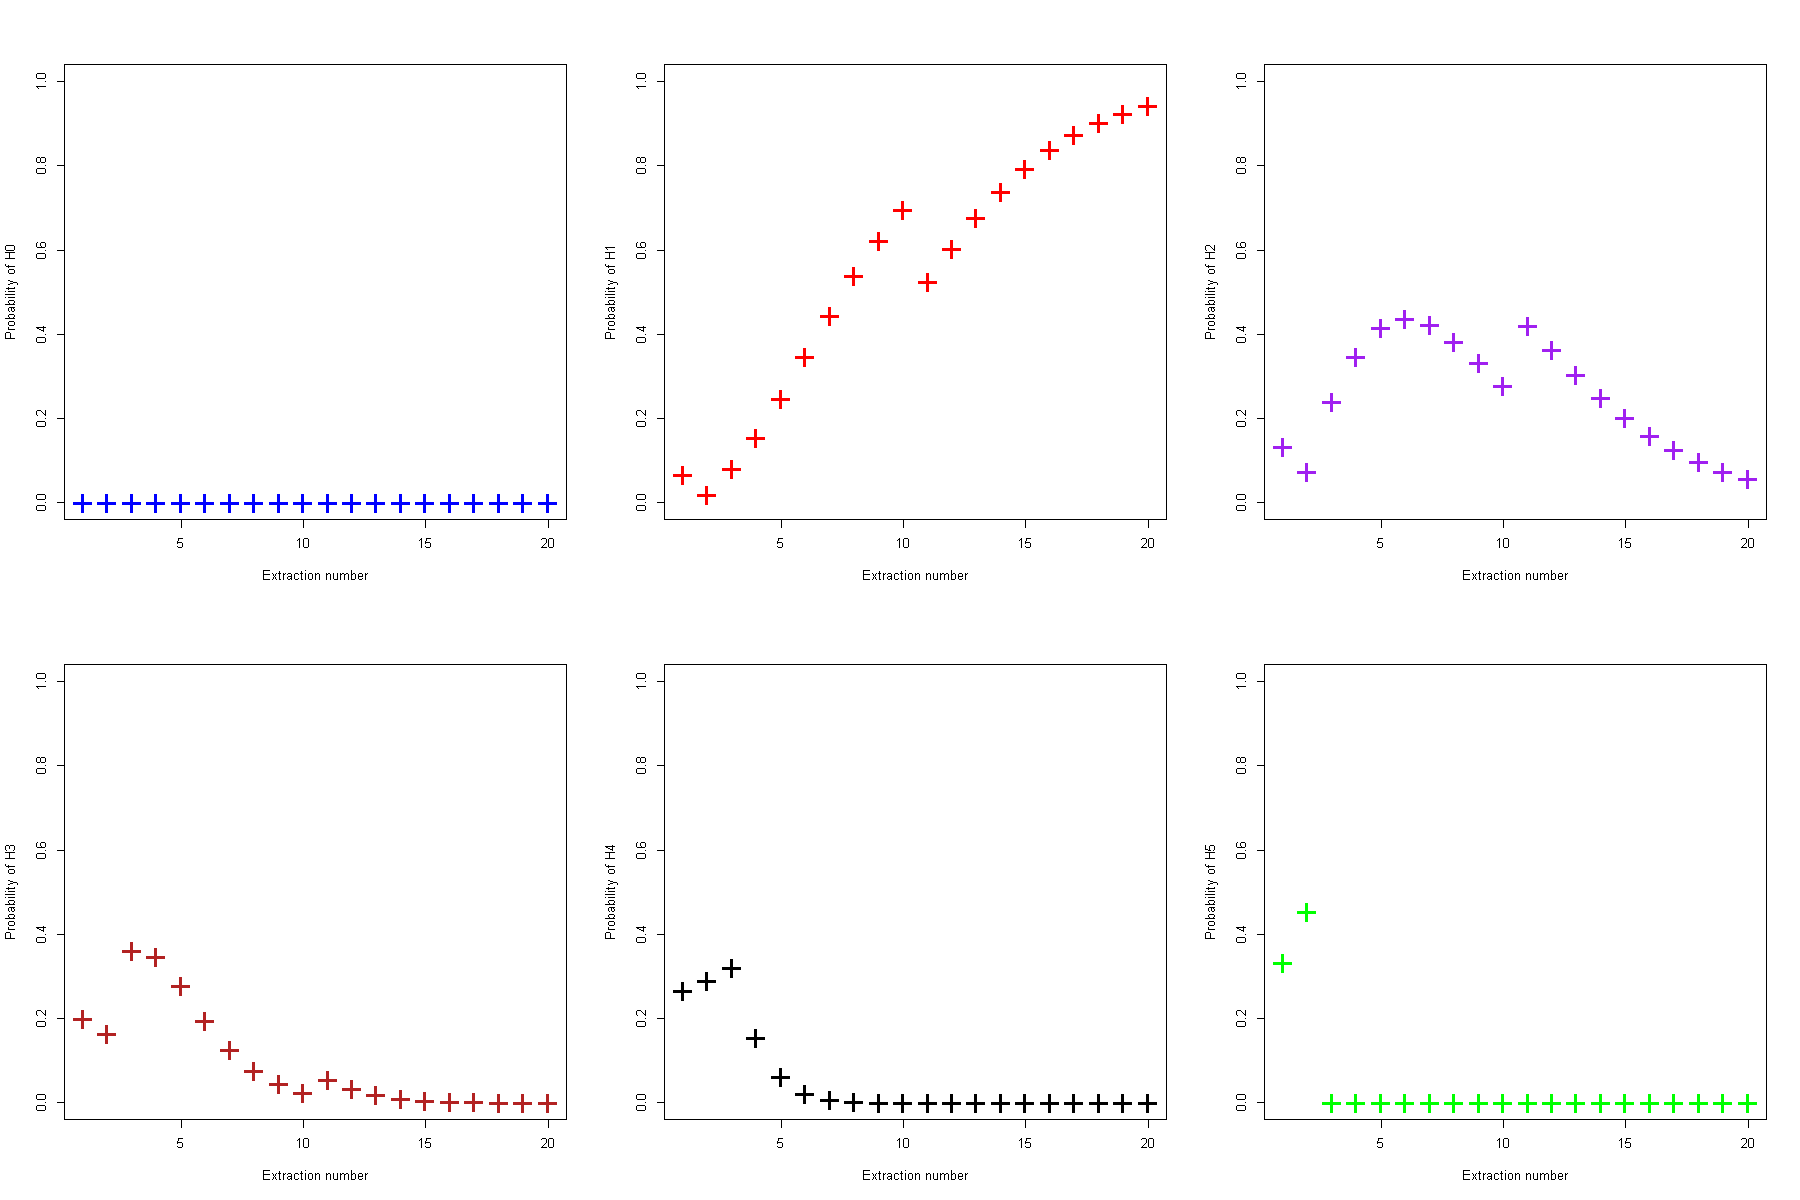

In [6]:
par(mfrow = c(2, 3))
options(repr.plot.width=15, repr.plot.height=10)
xs = seq(1,length(out_auto[,1]))
for (i in 1:6){
    plot(xs, out_auto[,i], xlab = "Extraction number", ylab = paste0("Probability of H", i-1), ylim = c(0,1), col = colors[i], pch="+", cex = 3)
}

## Exercise 3

• An important property of the gamma distribution is the so-called reproductive property

• given a sequence of independent random variable Xj ∼ Gamma($\alpha_j , \beta $), it follows that

$$Y = \sum_{j=1}^N X_j → Y \sim Gamma(\alpha, \beta) \,\,\,\,\,\, where \,\,\,\,\,\,  \alpha =\sum_{j=1}^n \alpha_j$$ 

• if $\alpha$ = m is an integer, a random variable from gamma distribution Gamma(m, $\beta$) (also known as Erlang distribution) can be obtained by summing m independent exponential random variables Xj ∼ Exp(β):

$$ Y = \beta \sum_{j=1}^N −\ln Uj = −\beta \ln \prod_{j=1}^N U_j$$

a) write an algorithm to sample variables from an Erlang distribution Gamma(m, β)


$$ f(x;k,\lambda )={\lambda ^{k}x^{k-1}e^{-\lambda x} \over (k-1)!}\quad {\mbox{per }}x,\lambda \geq 0$$


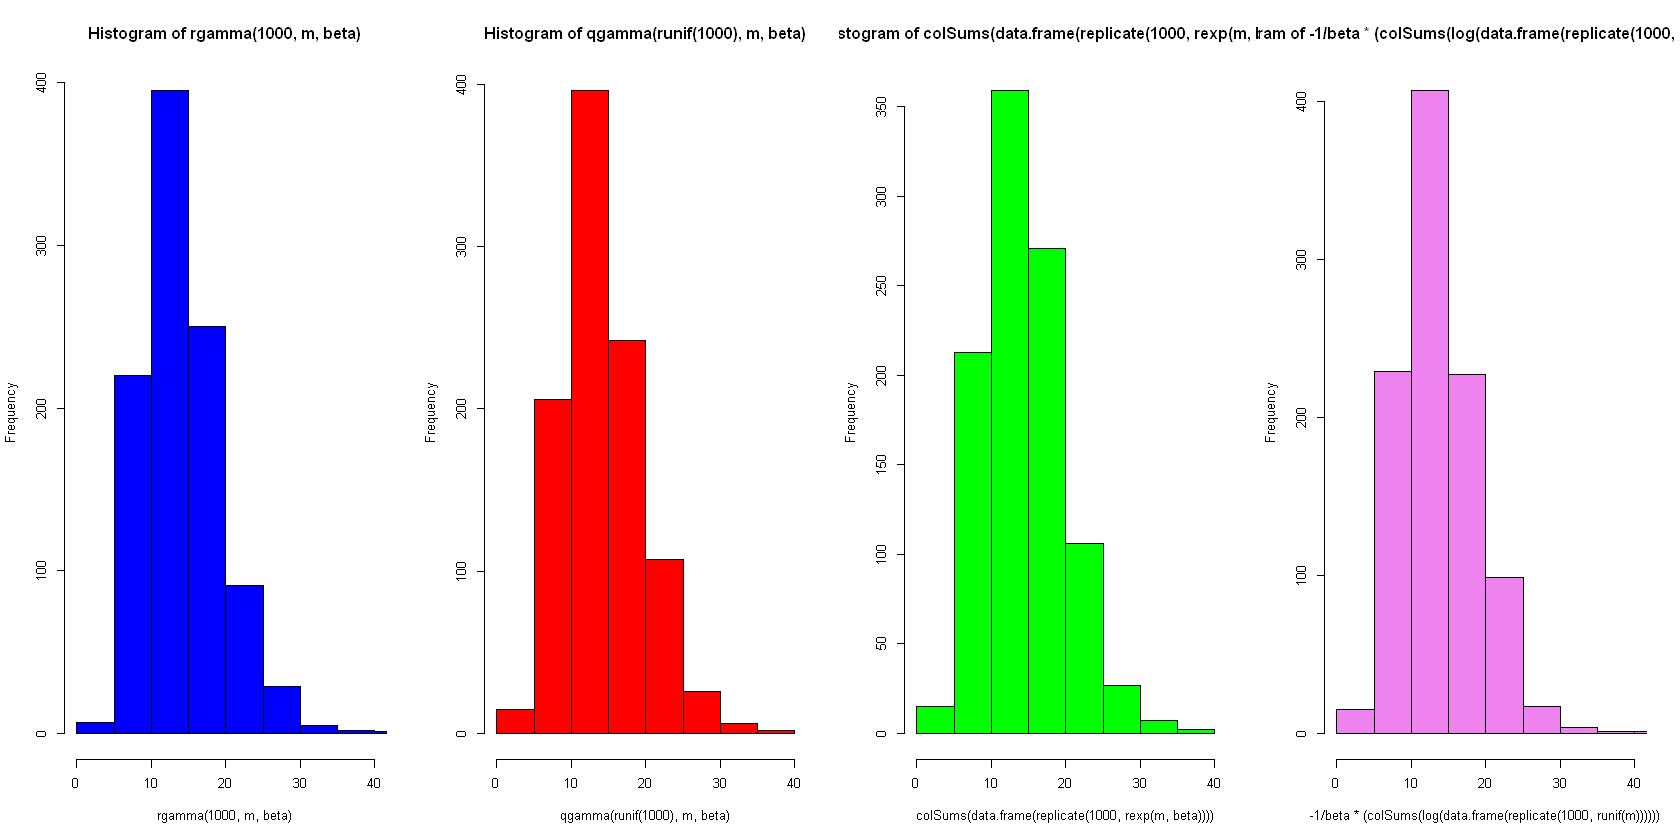

In [7]:
m = 7
beta = 0.5

par(mfrow = c(1, 4))
options(repr.plot.width=14, repr.plot.height=7)

hist(rgamma(1000, m, beta), c = "blue", xlim=c(0, 40))

hist(qgamma(runif(1000), m, beta), c = "red", xlim=c(0, 40))

hist(colSums(data.frame(replicate(1000,rexp(m, beta)))), c = 'green' ,xlim=c(0, 40))

hist(-1/beta*(colSums(log(data.frame(replicate(1000,runif(m)))))), c = 'violet', xlim=c(0, 40))

## Exercise 4
• one of the first random number generator was proposed by von Neumann, the so-called
middle square algorithm

• write R code to implement this type of generator and, given a fixed digit number input,
square it an remove the leading and trailing digits, in order to return a number with the
same number of digits as the original number

• Suggestion : after having squared the number, convert it to a list of characters

```number <- unlist(strsplit(as.character(x.squared),"")) ```

and, after having removed the head and tail of the list, convert it back to a number

```as.numeric(paste(number.after.trimming, collapse=""))```


In [8]:
rVonNeumann <- function(x){
    number <- unlist(strsplit(as.character(x^2),""))
    dim <-  length(unlist(strsplit(as.character(x),"")))
    if (length(number) == length(dim)){
        message("Error: Same number of digits, returning input")
        return(x)
    }

    while(length(number)>dim){
        if(length(number)>=dim+2){
            number <- number[-1]
            number <- number[-length(number)]
        }else{
            number <- number[-1]
        }
    }
    
    return(as.numeric(paste(number, collapse="")))
} 

rVonNeumann(5772156649)

[1] 7923805949